In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Valores_Nulos_Limpios_Copehnague.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   21528 non-null  int64  
 1   last_scraped                 21528 non-null  object 
 2   name                         21528 non-null  object 
 3   description                  21528 non-null  object 
 4   neighborhood_overview        21528 non-null  object 
 5   host_location                21528 non-null  object 
 6   host_response_time           21528 non-null  object 
 7   host_response_rate           21528 non-null  float64
 8   host_acceptance_rate         21528 non-null  float64
 9   host_is_superhost            21528 non-null  object 
 10  host_verifications           21528 non-null  object 
 11  host_has_profile_pic         21528 non-null  object 
 12  host_identity_verified       21528 non-null  object 
 13  neighbourhood   

In [9]:
cualitativas = data.iloc[:, [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 17, 18, 21, 24, 25, 35, 43, 50]]
cuantitativas = data.iloc[:, [7, 8, 15, 16, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51]]


<Figure size 1500x800 with 0 Axes>

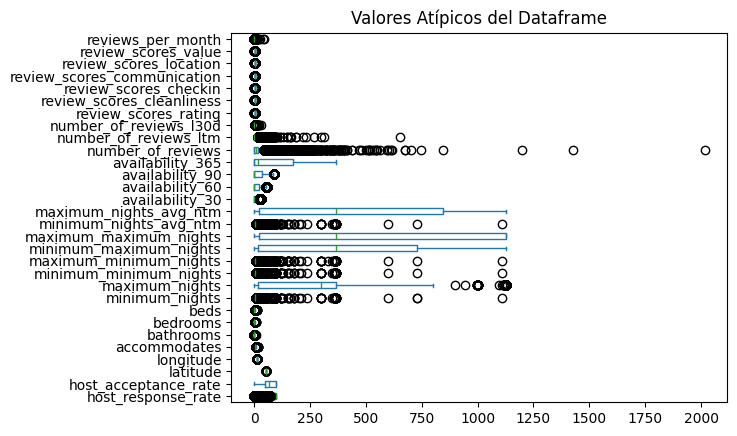

In [10]:
fig= plt.figure(figsize= (15,8))
cuantitativas.plot(kind= 'box',vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [11]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           21528 non-null  float64
 1   host_acceptance_rate         21528 non-null  float64
 2   latitude                     21528 non-null  float64
 3   longitude                    21528 non-null  float64
 4   accommodates                 21528 non-null  int64  
 5   bathrooms                    21528 non-null  float64
 6   bedrooms                     21528 non-null  float64
 7   beds                         21528 non-null  float64
 8   minimum_nights               21528 non-null  int64  
 9   maximum_nights               21528 non-null  int64  
 10  minimum_minimum_nights       21528 non-null  int64  
 11  maximum_minimum_nights       21528 non-null  int64  
 12  minimum_maximum_nights       21528 non-null  int64  
 13  maximum_maximum_

In [12]:
#ENCUENTRO LOS VALORES EXTREMOS APLICANDO DESVIACIÓN ESTANDAR

y=cuantitativas
Limite_Superior= y.mean()+3*y.std()
Limite_Inferior= y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate              147.332696
host_acceptance_rate            154.744893
latitude                         55.738141
longitude                        12.652151
accommodates                      8.250151
bathrooms                         1.832897
bedrooms                          4.249206
beds                              4.699516
minimum_nights                   56.877471
maximum_nights                 1540.752304
minimum_minimum_nights           53.620798
maximum_minimum_nights           56.727044
minimum_maximum_nights         1724.925830
maximum_maximum_nights         1750.602100
minimum_nights_avg_ntm           54.553870
maximum_nights_avg_ntm         1735.575961
availability_30                  33.739645
availability_60                  72.492671
availability_90                 113.395003
availability_365                453.203531
number_of_reviews               145.529277
number_of_reviews_ltm            39.061855
number_of_reviews_l30d      

In [13]:
#OBTENEMOS LOS DATOS Y LOS OUTLIERS SE CONVIERTEN EN NULOS EN EL DATAFRAME
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,100.0,55.693880,12.547250,2.0,1.0,1.0,1.0,3.0,1125,...,98.0,3.0,0.0,4.90,4.92,4.91,4.95,4.90,4.79,0.66
1,90.0,67.0,55.666602,12.555283,6.0,1.0,4.0,1.0,3.0,10,...,19.0,0.0,0.0,4.88,4.88,4.87,4.82,4.80,4.53,0.11
2,100.0,100.0,55.672638,12.552493,4.0,1.0,2.0,1.0,3.0,5,...,83.0,2.0,0.0,4.91,4.93,4.89,4.91,4.89,4.71,0.48
3,90.0,67.0,55.711760,12.570910,4.0,1.0,2.0,1.0,NaN,1125,...,7.0,0.0,0.0,4.57,4.50,5.00,5.00,4.50,4.50,0.04
4,100.0,100.0,55.684288,12.573019,6.0,1.0,2.0,2.0,5.0,1125,...,34.0,10.0,2.0,4.94,4.89,4.82,5.00,4.93,4.89,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,90.0,67.0,55.688690,12.564960,4.0,1.0,2.0,2.0,5.0,7,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21524,90.0,67.0,55.699463,12.581952,4.0,1.0,2.0,2.0,1.0,12,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21525,90.0,67.0,55.666150,12.610850,3.0,1.0,2.0,2.0,4.0,365,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21526,90.0,67.0,55.646570,12.524930,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48


In [14]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data3.isnull().sum()
valores_nulos

host_response_rate             791
host_acceptance_rate             0
latitude                       107
longitude                       30
accommodates                   180
bathrooms                      975
bedrooms                       160
beds                           505
minimum_nights                 125
maximum_nights                   0
minimum_minimum_nights         118
maximum_minimum_nights         156
minimum_maximum_nights           0
maximum_maximum_nights           0
minimum_nights_avg_ntm         138
maximum_nights_avg_ntm           0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews              308
number_of_reviews_ltm          344
number_of_reviews_l30d         389
review_scores_rating           462
review_scores_cleanliness      394
review_scores_checkin          378
review_scores_communication    357
review_scores_location         446
review_scores_value 

In [15]:
data_clean= data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,100.0,55.693880,12.547250,2.0,1.0,1.0,1.0,3.0,1125,...,98.0,3.0,0.0,4.90,4.92,4.91,4.95,4.90,4.79,0.66
1,90.0,67.0,55.666602,12.555283,6.0,1.0,4.0,1.0,3.0,10,...,19.0,0.0,0.0,4.88,4.88,4.87,4.82,4.80,4.53,0.11
2,100.0,100.0,55.672638,12.552493,4.0,1.0,2.0,1.0,3.0,5,...,83.0,2.0,0.0,4.91,4.93,4.89,4.91,4.89,4.71,0.48
3,90.0,67.0,55.711760,12.570910,4.0,1.0,2.0,1.0,3.6,1125,...,7.0,0.0,0.0,4.57,4.50,5.00,5.00,4.50,4.50,0.04
4,100.0,100.0,55.684288,12.573019,6.0,1.0,2.0,2.0,5.0,1125,...,34.0,10.0,2.0,4.94,4.89,4.82,5.00,4.93,4.89,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,90.0,67.0,55.688690,12.564960,4.0,1.0,2.0,2.0,5.0,7,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21524,90.0,67.0,55.699463,12.581952,4.0,1.0,2.0,2.0,1.0,12,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21525,90.0,67.0,55.666150,12.610850,3.0,1.0,2.0,2.0,4.0,365,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21526,90.0,67.0,55.646570,12.524930,2.0,1.0,1.0,1.0,1.0,365,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48


In [16]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data_clean.isnull().sum()
valores_nulos

host_response_rate             0
host_acceptance_rate           0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int

In [17]:
#METODO APLICANDO CUARTILES, ENCUENTRO CUARTILES 0.25 Y 0.75
y=cuantitativas
percentile25= y.quantile(0.25) #Q1
percentile75= y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25- 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_response_rate              115.000000
host_acceptance_rate            167.500000
latitude                         55.740856
longitude                        12.640099
accommodates                      7.000000
bathrooms                         1.000000
bedrooms                          3.500000
beds                              3.500000
minimum_nights                    7.000000
maximum_nights                  882.500000
minimum_minimum_nights            7.000000
maximum_minimum_nights            7.000000
minimum_maximum_nights         1795.000000
maximum_maximum_nights         2781.000000
minimum_nights_avg_ntm            7.000000
maximum_nights_avg_ntm         2085.250000
availability_30                  20.000000
availability_60                  52.500000
availability_90                  87.500000
availability_365                432.500000
number_of_reviews                44.500000
number_of_reviews_ltm            15.000000
number_of_reviews_l30d      

In [18]:
#OBTENEMOSN DATOS LIMPIOS DEL DATAFRAME
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(Limite_Inferior_iqr)]
data3_iqr

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,100.0,55.693880,12.547250,2.0,1.0,1.0,1.0,3.0,NaN,...,NaN,3.0,0.0,4.90,4.92,4.91,4.95,4.90,4.79,0.66
1,90.0,67.0,55.666602,12.555283,6.0,1.0,NaN,1.0,3.0,10.0,...,19.0,0.0,0.0,4.88,4.88,4.87,4.82,4.80,4.53,0.11
2,100.0,100.0,55.672638,12.552493,4.0,1.0,2.0,1.0,3.0,5.0,...,NaN,2.0,0.0,4.91,4.93,4.89,4.91,4.89,4.71,0.48
3,90.0,67.0,55.711760,12.570910,4.0,1.0,2.0,1.0,NaN,NaN,...,7.0,0.0,0.0,4.57,4.50,5.00,5.00,4.50,4.50,0.04
4,100.0,100.0,55.684288,12.573019,6.0,1.0,2.0,2.0,5.0,NaN,...,34.0,10.0,2.0,4.94,4.89,4.82,5.00,4.93,4.89,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,90.0,67.0,55.688690,12.564960,4.0,1.0,2.0,2.0,5.0,7.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21524,90.0,67.0,55.699463,12.581952,4.0,1.0,2.0,2.0,1.0,12.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21525,90.0,67.0,55.666150,12.610850,3.0,1.0,2.0,2.0,4.0,365.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21526,90.0,67.0,55.646570,12.524930,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48


In [19]:
#CORROBORAMOS VALORES NULOS
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_response_rate                0
host_acceptance_rate              0
latitude                          0
longitude                         0
accommodates                    498
bathrooms                      1685
bedrooms                        857
beds                           1328
minimum_nights                  963
maximum_nights                 3806
minimum_minimum_nights          889
maximum_minimum_nights         1159
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm         1038
maximum_nights_avg_ntm            0
availability_30                2826
availability_60                2262
availability_90                1142
availability_365                  0
number_of_reviews              1992
number_of_reviews_ltm          1605
number_of_reviews_l30d         1324
review_scores_rating              0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location      

In [20]:
#remplazamos valores atipicos (nulos) del dataframe con mean

data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,100.0,100.0,55.693880,12.547250,2.0,1.0,1.0,1.0,3.0,168.3,...,9.9,3.0,0.0,4.90,4.92,4.91,4.95,4.90,4.79,0.66
1,90.0,67.0,55.666602,12.555283,6.0,1.0,1.5,1.0,3.0,10.0,...,19.0,0.0,0.0,4.88,4.88,4.87,4.82,4.80,4.53,0.11
2,100.0,100.0,55.672638,12.552493,4.0,1.0,2.0,1.0,3.0,5.0,...,9.9,2.0,0.0,4.91,4.93,4.89,4.91,4.89,4.71,0.48
3,90.0,67.0,55.711760,12.570910,4.0,1.0,2.0,1.0,3.0,168.3,...,7.0,0.0,0.0,4.57,4.50,5.00,5.00,4.50,4.50,0.04
4,100.0,100.0,55.684288,12.573019,6.0,1.0,2.0,2.0,5.0,168.3,...,34.0,10.0,2.0,4.94,4.89,4.82,5.00,4.93,4.89,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,90.0,67.0,55.688690,12.564960,4.0,1.0,2.0,2.0,5.0,7.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21524,90.0,67.0,55.699463,12.581952,4.0,1.0,2.0,2.0,1.0,12.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21525,90.0,67.0,55.666150,12.610850,3.0,1.0,2.0,2.0,4.0,365.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21526,90.0,67.0,55.646570,12.524930,2.0,1.0,1.0,1.0,1.0,365.0,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48


In [21]:
Datos_limpios= pd.concat([cualitativas, data4_iqr],axis=1)
Datos_limpios

,last_scraped,name,description,neighborhood_overview,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2024-09-28,Art&Design apt in hip Nørrebro - 2BR,"Bright, cozy, and well-furnished 3rd floor des...",The apartment is located in trendy Nørrebro wi...,"Copenhagen, Denmark",within an hour,f,"['email', 'phone']",t,t,...,9.9,3.0,0.0,4.90,4.92,4.91,4.95,4.90,4.79,0.66
1,2024-09-28,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...","Copenhagen, Denmark",a few days or more,f,"['email', 'phone']",t,t,...,19.0,0.0,0.0,4.88,4.88,4.87,4.82,4.80,4.53,0.11
2,2024-09-28,"155 m2 artist flat on Vesterbro, with 2 bathrooms",You enter a narrow entrance and feel the good ...,"Værnedamsvej area is super hip area, we call i...","Copenhagen, Denmark",within a few hours,t,"['email', 'phone']",t,t,...,9.9,2.0,0.0,4.91,4.93,4.89,4.91,4.89,4.71,0.48
3,2024-09-28,Cozy flat for Adults/Quiet for kids,Our flat is placed in a Central AND Quiet neig...,no neighborhood overview,"Copenhagen, Denmark",a few days or more,f,"['email', 'phone']",t,t,...,7.0,0.0,0.0,4.57,4.50,5.00,5.00,4.50,4.50,0.04
4,2024-09-28,0 min. from everything in Cph.,It doesn't get more central than this. Histori...,Area: <br />This is the eye of Cph. right betw...,"Copenhagen, Denmark",within an hour,t,"['email', 'phone']",t,t,...,34.0,10.0,2.0,4.94,4.89,4.82,5.00,4.93,4.89,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,2024-09-28,Charming apartment by the lakes,"In this stylish and well-appointed apartment, ...",no neighborhood overview,"Copenhagen, Denmark",a few days or more,f,"['email', 'phone']",t,t,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21524,2024-09-28,Bright and Spacious apartment,Bright and spacious apartment - close to inner...,no neighborhood overview,"Copenhagen, Denmark",a few days or more,f,"['email', 'phone']",t,f,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21525,2024-09-28,Moderne lejlighed i København,"Here is plenty of room for the family, while y...",no neighborhood overview,"Copenhagen, Denmark",a few days or more,f,"['email', 'phone']",t,t,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48
21526,2024-09-28,Hyggelig lejlighed i København,Cozy apartment with good space. The apartment ...,no neighborhood overview,"Copenhagen, Denmark",a few days or more,f,['phone'],t,t,...,0.0,0.0,0.0,4.92,4.82,4.96,5.00,4.91,4.78,0.48


In [22]:
#CORROBORAMOS VALORES NULOS
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                   0
name                           0
description                    0
neighborhood_overview          0
host_location                  0
host_response_time             0
host_is_superhost              0
host_verifications             0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
has_availability               0
last_review                    0
instant_bookable               0
host_response_rate             0
host_acceptance_rate           0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_mi

In [23]:
Datos_limpios.to_csv("Datos_limpios.csv")